In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import shutil

In [3]:
ca.set_log_level('INFO')

In [15]:
%matplotlib inline

In [5]:
pwd

'/Users/amnon/git/paper-metaanalysis/scripts'

# Load the data
### Without the known blooming bacteria (from American Gut paper)

In [6]:
ca.set_log_level('ERROR')
ratios=ca.read_amplicon('../ratios/ratios_no_bloom.biom','../studies/index.csv',
                        feature_metadata_file='../taxonomy/DB1-15_taxonomy_svs_numbers.tsv',normalize=None, min_reads=None)
ca.set_log_level('INFO')

In [7]:
ratios.sparse = False
ratios

AmpliconExperiment with 59 samples, 731 features

## Fix taxonomy and filter chloroplast/mitochondria

In [8]:
ratios.feature_metadata['taxonomy'] = ratios.feature_metadata.Taxon

In [9]:
ratios.feature_metadata['taxonomy'].fillna('NA',inplace=True)

In [10]:
ratios = ratios.filter_by_taxonomy(['chloroplast','cyanobacteria','mitochondria'],negate=True)

2021-07-23 19:38:11 INFO 730 features remain.


In [11]:
disease_colors = {}
disease_colors = {xx: (0,0,0) for xx in ratios.sample_metadata.disease.unique()}
disease_colors.update({'HIV': (1.00,0.93,0.35),'Autism': (0.50,0.99,0.52),'Bipolar': (1.00, 0.63, 0.00),
         'IBD_Crohn disease': (0.72,0.11,0.11),'IBD_Ulcerative Colitis': (0.72,0.11,0.11),
         'IBD_Inflammtory bowel disease': (0.72,0.11,0.11),
         'Diabetes T2': (0.47,0.53,0.80),
         'Depression': (0.48,0.12,0.64),
         'Obesity': (0.25,0.32,0.71),
         'Parkinson’s': (0.29,0.08,0.55),
         'Schizophrenia': (0.88,0.75,0.91),     
         'Gastroenteritis': (0.94,0.33,0.31),
         'Heart diseases': (0.33,0.43,1.00),
         'Irritable bowel syndrom': (0.90,0.45,0.45),
         'Alzheimer': (0.83, 0.83, 0.83), 'Anorexia': (0.83, 0.83, 0.83), 'Cancer': (0.83, 0.83, 0.83), 'Autoimmun diseases': (0.83, 0.83, 0.83), 'C.difficile infection': (0.83, 0.83, 0.83), 
         'Cancer': (0.83, 0.83, 0.83), 'Chronic fatigue syndrome': (0.83, 0.83, 0.83), 'Diabetes T1': (0.83, 0.83, 0.83),  'Gout': (0.83, 0.83, 0.83),
         'Hepatitis B': (0.83, 0.83, 0.83), 'Hepatitis C': (0.83, 0.83, 0.83), 'Hypertension': (0.83, 0.83, 0.83), 
         'Lupus': (0.83, 0.83, 0.83), 'Pancreatitis': (0.83, 0.83, 0.83), 'Psoriasis': (0.83, 0.83, 0.83), 'Rheumatoid arthritis': (0.83, 0.83, 0.83), 
                
         })

### creat a chart pie for diseases

In [16]:
ratios.sample_metadata['pie_disease']=ratios.sample_metadata.disease.copy()
ratios.sample_metadata.pie_disease.replace('Gout','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Irritable bowel syndrom','IBS',inplace=True)
ratios.sample_metadata.pie_disease.replace('Hepatitis B','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('IBD_Crohn disease','IBD',inplace=True)
ratios.sample_metadata.pie_disease.replace('IBD_Ulcerative Colitis','IBD',inplace=True)
ratios.sample_metadata.pie_disease.replace('IBD_Inflammtory bowel disease','IBD',inplace=True)
ratios.sample_metadata.pie_disease.replace('Alzheimer','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Anorexia','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Autoimmun diseases','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Cancer','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('C.difficile infection','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Diabetes T1','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Hypertension','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Chronic fatigue syndrome','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Gout','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('C.difficile infection','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Gout','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Lupus','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Pancreatitis','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Psoriasis','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Rheumatoid arthritis','Other',inplace=True)

pass

In [17]:
disease_colors.update({'HIV': (1.00,0.93,0.35),'Autism': (0.50,0.99,0.52),
         'Bipolar': (1.00, 0.63, 0.00),
         'IBD': (0.72,0.11,0.11),     
         'Diabetes T2': (0.47,0.53,0.80),
         'Depression': (0.48,0.12,0.64),
         'Obesity': (0.25,0.32,0.71),
         'Parkinson’s': (0.29,0.08,0.55),
         'Schizophrenia': (0.88,0.75,0.91),     
         'Gastroenteritis': (0.94,0.33,0.31),
         'Heart diseases': (0.33,0.43,1.00),
         'IBS': (0.90,0.45,0.45),  
         'Other': (0.83, 0.83, 0.83)}) 

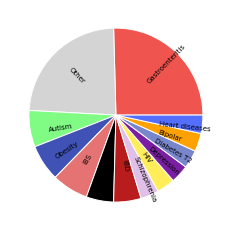

In [18]:
plt.figure()
pp=plt.pie(ratios.sample_metadata.pie_disease.value_counts(),textprops={'fontsize': 7}, labels=ratios.sample_metadata.pie_disease.unique(), labeldistance=0.5, rotatelabels=True)
for pie_wedge in pp[0]:
    pie_wedge.set_edgecolor('white')
    pie_wedge.set_facecolor(disease_colors[pie_wedge.get_label()])


### Prepare the colormap for the heatmaps
We want coolwarm, with white for exact 0s (which mean not present)

In [19]:
current_cmap = mpl.cm.get_cmap('coolwarm')
current_cmap.set_bad(color='red')
ncm = current_cmap(np.linspace(0,1,1000000))
ncm[500000]=(1,1,1,1)
ncm=mpl.colors.ListedColormap(ncm)

<ipython-input-19-ed222efa150a>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
  current_cmap.set_bad(color='red')


# Look at the data

In [20]:
ratios.plot(gui='qt5',norm=None,cmap=ncm ,clim=[-0.5,0.5], bad_color='w')

creating logger


In [21]:
ratios=ratios.sort_abundance(key=np.mean)

In [22]:
cu.splot(ratios,'disease',norm=None,cmap=ncm,clim=[-0.5,0.5],xticks_max=None)


# Plot all bacteria

## aggregate all samples by disease so CD/UC count as 1

In [23]:
ratios_agg=ratios.aggregate_by_metadata('disease',agg='mean')
ratios_agg

AmpliconExperiment with 28 samples, 730 features

In [24]:
cu.splot(ratios_agg,'disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None)

In [25]:
ratios

AmpliconExperiment with 59 samples, 730 features

## Sort by mean abundance over all disease
With 1 sample per disease (aggregation by mean)

In [26]:
ratios_agg=ratios_agg.sort_abundance(key=np.mean)

In [27]:
cu.splot(ratios_agg,'disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None)

In [28]:
allbact = ratios.filter_ids(ratios_agg.feature_metadata.index)
allbact = allbact.sort_samples('disease')

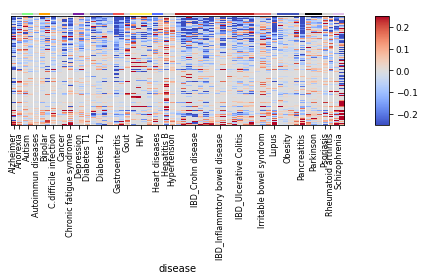

In [29]:
f=allbact.plot(sample_field='disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None,xticklabel_len=None,
                   xticklabel_kwargs={'size':8, 'rotation':90}, barx_fields=['disease'],barx_label=False,barx_colors=disease_colors)

In [95]:
f.save_figure('../figures/fig1/heatmap-allbact.pdf')

# Plot the non-specific bacteria
Using the binomial sign test (only on experiments where the bacteria is present), with at least 4 experiments per bacteria. FDR=0.1

The test is done on 1 aggregated sample per disease to prevent bias by disease with many studies

In [30]:
np.random.seed(2020)
nonspecific_agg=cu.get_sign_pvals(ratios_agg,alpha=0.1,min_present=4)

keeping 665 features with enough ratios
found 128 significant


In [31]:
nonspecific = ratios.filter_ids(nonspecific_agg.feature_metadata.index)
nonspecific = nonspecific.sort_samples('disease')

In [32]:
nonspecific.feature_metadata = nonspecific.feature_metadata.join(nonspecific_agg.feature_metadata,lsuffix='',rsuffix='_agg')

In [33]:
cu.splot(nonspecific,'disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None,xticklabel_len=None)

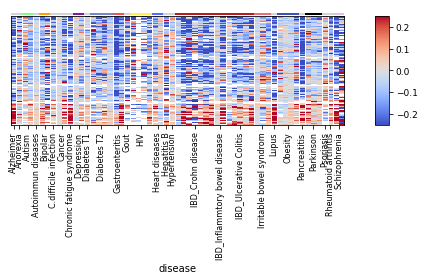

In [34]:
f=nonspecific.plot(sample_field='disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None,xticklabel_len=None,
                   xticklabel_kwargs={'size':8, 'rotation':90},barx_fields=['disease'],barx_label=False,barx_colors=disease_colors)


In [101]:
f.save_figure('../figures/fig3/heatmap-nonspecific.pdf')

### Save the non-secific bacteria

In [102]:
nonspecific_agg.save('../ratios/nonspecific/nonspecific')

In [103]:
nonspecific_agg.save_fasta('../ratios/nonspecific/nonspecific.fa',header='seq')

In [104]:
nonspecific.save('../ratios/nonspecific/nonspecific_all',fmt='txt')

2021-04-04 17:50:43 WARNING .txt format does not support taxonomy information in save. Saving without taxonomy.


### Also save only the ones going up or down

In [35]:
nsup_ids=nonspecific_agg.feature_metadata[nonspecific_agg.feature_metadata.esize > 0]
nsdown_ids=nonspecific_agg.feature_metadata[nonspecific_agg.feature_metadata.esize < 0]

In [36]:
len(nsup_ids)

31

In [37]:
len(nsdown_ids)

97

In [38]:
nsup = nonspecific.filter_ids(nsup_ids.index)
nsup.save('../ratios/nonspecific/nonspecific-up')

In [39]:
nsdown = nonspecific.filter_ids(nsdown_ids.index)
nsdown.save('../ratios/nonspecific/nonspecific-down')

## how many higher/lower in non-specific

In [40]:
np.sum(nonspecific_agg.feature_metadata.esize<0)

97

In [41]:
np.sum(nonspecific_agg.feature_metadata.esize>0)

31

## Get the enriched dbBact terms

In [42]:
nonspecific_agg.feature_metadata['_calour_stat'] = nonspecific_agg.feature_metadata['esize']
nonspecific_agg.feature_metadata['_calour_direction'] = 'down'
nonspecific_agg.feature_metadata.loc[nonspecific_agg.feature_metadata['esize']>0,'_calour_direction']='up'

In [43]:
nonspecific_agg.feature_metadata

,Taxon,Confidence,SV_number,_feature_id,taxonomy,esize,pval,qval,_calour_stat,_calour_direction
Feature_ID,,,,,,,,,,
TACGTAGGTGGCGAGCGTTATCCGGAATTATTGGGCGTAAAGAGGGAGCAGGCGGCACTAAGGGTCTGTGGTGAAAGATCGAAGCTTAACTTCGGTAAGCCATGGAAACCGTAGAGCTAGAGTGTGTGAGAGGATCGTGGAATTCCATGT,k__Bacteria;_p__Firmicutes;_c__Erysipelotrichi...,1.000000,SV14209,TACGTAGGTGGCGAGCGTTATCCGGAATTATTGGGCGTAAAGAGGG...,k__Bacteria;_p__Firmicutes;_c__Erysipelotrichi...,-0.928571,2.160668e-07,0.000144,-0.928571,down
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGAGACAAGTCTGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTGGAAACTGCCTTGCTAGAGTGCTGGAGAGGTAAGTGGAATTCCTAG,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,0.897643,SV09510,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,-0.857143,3.032386e-06,0.000672,-0.857143,down
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGGTGGCAAGGCAAGCCAGAAGTGAAAACCCGGGGCTCAACCGCGGGATTGCTTTTGGAACTGTCATGCTAGAGTGCAGGAGGGGTGAGCGGAATTCCTAG,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,0.844269,SV15397,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,-0.857143,3.032386e-06,0.000672,-0.857143,down
AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAAACCATGGGCTCAACCCATGAATTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGATGGAATTCCCGG,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,0.992631,SV00156,AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAG...,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,-0.785714,2.744049e-05,0.002028,-0.785714,down
AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGG,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,0.998895,SV00210,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAG...,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,-0.785714,2.744049e-05,0.002028,-0.785714,down
...,...,...,...,...,...,...,...,...,...,...
TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGGGAACGCAGGCGGTCTTTTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGTAGTGCATTGGAAACTGGAAGACTTGAGTGCAGAAGAGGAGAGTGGAACTCCATG,k__Bacteria;_p__Firmicutes;_c__Bacilli;_o__Lac...,0.952094,SV14010,TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGGGAA...,k__Bacteria;_p__Firmicutes;_c__Bacilli;_o__Lac...,0.727273,8.554459e-04,0.019569,0.727273,up
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTTAAGCAAGTCTGAAGTGAAAGCCCGGGGCTCAACCCCGGTACTGCTTTGGAAACTGTTTGACTTGAGTGCAGGAGAGGTAAGTGGAATTCCTAG,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,0.999899,SV09927,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,0.703704,3.107488e-04,0.011480,0.703704,up
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGAAGAGCAAGTCTGATGTGAAAGGCTGGGGCTTAACCCCAGGACTGCATTGGAAACTGTTTTTCTAGAGTGCCGGAGAGGTAAGCGGAATTCCTAG,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,0.999984,SV08959,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,k__Bacteria;_p__Firmicutes;_c__Clostridia;_o__...,0.769231,8.797646e-05,0.005319,0.769231,up


2021-07-23 19:39:56 INFO Getting dbBact annotations for 128 sequences, please wait...
2021-07-23 19:40:07 INFO got 2360 annotations
2021-07-23 19:40:08 INFO Got 19695 annotation-sequence pairs
2021-07-23 19:40:08 INFO Added annotation data to experiment. Total 2360 annotations, 128 ASVs


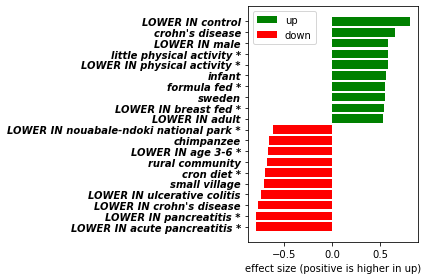

In [44]:
f,dterms = nonspecific_agg.plot_diff_abundance_enrichment()

In [45]:
f.figure.savefig('../figures/nonspecific-dbbact-terms.pdf')

### Draw the dbbact term wordcloud for the non-specific bacteria

In [46]:
dbbact=ca.database._get_database_class('dbbact')

2021-07-23 19:41:01 INFO Getting dbBact annotations for 128 sequences, please wait...
2021-07-23 19:41:06 INFO got 2360 annotations
2021-07-23 19:41:06 INFO Got 19695 annotation-sequence pairs
2021-07-23 19:41:06 INFO Added annotation data to experiment. Total 2360 annotations, 128 ASVs


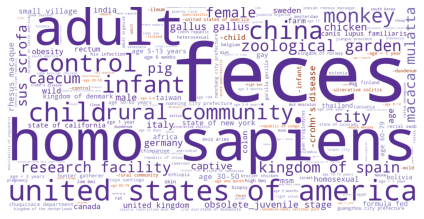

In [47]:
f=dbbact.draw_wordcloud(nonspecific)

In [48]:
f.savefig('../figures/fig3/wordcloud-nonspecific.pdf')

2021-07-23 19:41:18 INFO Getting dbBact annotations for 31 sequences, please wait...
2021-07-23 19:41:29 INFO got 1758 annotations
2021-07-23 19:41:29 INFO Got 4824 annotation-sequence pairs
2021-07-23 19:41:29 INFO Added annotation data to experiment. Total 1758 annotations, 31 ASVs


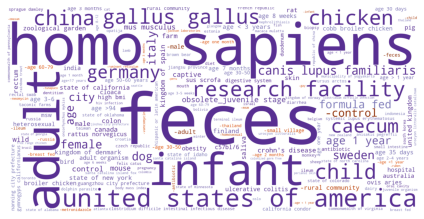

In [49]:
f=dbbact.draw_wordcloud(nsup)

In [50]:
f.savefig('../figures/fig3/wordcloud-nonspecific-up.pdf')

2021-07-23 19:41:35 INFO Getting dbBact annotations for 97 sequences, please wait...
2021-07-23 19:41:39 INFO got 1487 annotations
2021-07-23 19:41:39 INFO Got 14871 annotation-sequence pairs
2021-07-23 19:41:39 INFO Added annotation data to experiment. Total 1487 annotations, 97 ASVs


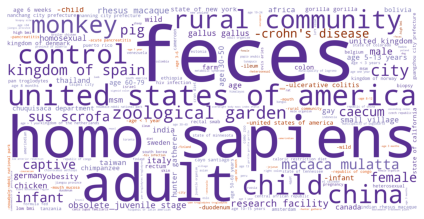

In [51]:
f=dbbact.draw_wordcloud(nsdown)

In [52]:
f.savefig('../figures/fig3/wordcloud-nonspecific-down.pdf')

### Get the dbBact term F-Scores for the nonspecific-up ASVs

In [53]:
db=ca.database._get_database_class('dbbact')

In [55]:
fscores, recall, precision, term_count, reduced_f = db.get_wordcloud_stats(exp=nsup)

In [ ]:
#fscores, recall, precision, term_count, reduced_f = self.get_wordcloud_stats(exp=exp, features=features, ignore_exp=ignore_exp, freq_weighted=freq_weighted, focus_terms=focus_terms, threshold=threshold, max_id=max_id)

In [66]:
nsupf = sorted(fscores.items(), key=lambda item: item[1],reverse=True)[:10]

# IBD specific

In [67]:
def nzdiff(data,labels):
    '''Calculate the mean difference between two groups without using 0s
    used for the calour.diff_abundance for only non-zero samples
    
    Parameters
    ----------
    data: np.array
        sample * feature(similar to calour Experiment.data)
    labels:::: np.array of 0s and 1s
        the label for each sample.
    
    Returns
    -------
    np.array
        for each feature, mean(group1:group1!=0)- mean(group2: group2!=0)
    '''
    data0=data[:,labels==0]
    data1=data[:,labels==1]
    res = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        m1=data1[i,:]
        m1=m1[m1!=0]
        if len(m1) == 0:
            continue
        m1=np.mean(m1)
        m0=data0[i,:]
        m0=m0[m0!=0]
        if len(m0) == 0:
            continue
        m0=np.mean(m0)
        res[i]= m1 - m0
    return res

In [68]:
def ratio_enrichment(exp, field, val1, val2=None, alpha=0.1, min_prev=3, random_seed=None, transform=None):
    '''Identify bacteria significantly enriched (i.e. ratios higher/lower) in samples with field=val1 vs. val2 (or all other samples if val2==None)
    Test is performed only on non-zero features present in at least min_prev samples in each group.
    
    Parameters
    ----------
    exp: calour.Experiment
        The experiment to test
    field: str
        Name of the field for identifying the 2 groups of samples
    val1: str or list of str
        Values of field for the first group of samples
    val2: str or list of str or None
        Values of field for the second group of samples. If None, use all samples not with val1
    alpha: float, optional
        the dsFDR threshold
    min_prev: int, optional
        use only bacteria present in at least min_prev samples (not 0) in each group
    random_seed: int, optional
    transform: str or None, optional
        the data transform (from ca.diff_abundance)
    '''
    # pre filter the data to keep only features present in enough samples in both groups
    e1 = exp.filter_samples(field, val1)
    e1.sparse=False
    e1.data[e1.data!=0] = 1
    e1 = e1.filter_sum_abundance(min_prev)
    if val2 is None:
        e2 = exp.filter_samples(field, val1, negate=True)
    else:
        e2 = exp.filter_samples(field, val2)
    e2.sparse=False
    e2.data[e2.data!=0] = 1
    e2 = e2.filter_sum_abundance(min_prev)
    # keep only features present in > min_prev samples in group1 and group2
    exp = exp.filter_ids(e1.feature_metadata.index)
    exp = exp.filter_ids(e2.feature_metadata.index)
    print('%d remaining after filtering for min_prev %d' % (len(exp.feature_metadata), min_prev))

    # find the features significantly different between group1 and group2
    # we use the nzdiff statist
    dd=exp.diff_abundance(field,val1,val2, transform=transform,alpha=alpha,method=nzdiff,random_seed=random_seed)
    return dd

### remove the biopsies studies

In [69]:
ratios_no_biop = ratios.filter_samples('_sample_id',['23', '29', '49', '52'],negate=True)
ratios_no_biop

AmpliconExperiment with 55 samples, 730 features

# Calculate the specific bacteria
## without the Gevers biopsies studies

In [70]:
np.random.seed(2020)
specific_no_biop=ratio_enrichment(ratios_no_biop, 'disease',['IBD_Crohn disease','IBD_Ulcerative Colitis'],
                                  alpha=0.1, min_prev=3,random_seed=2020, transform='rankdata')

2021-07-23 19:51:20 WARNING Do you forget to normalize your data? It is required before running this function
2021-07-23 19:51:20 INFO After filtering, 583 remain.
2021-07-23 19:51:20 WARNING Do you forget to normalize your data? It is required before running this function
2021-07-23 19:51:20 INFO After filtering, 672 remain.
2021-07-23 19:51:20 WARNING 89 ids were not in the experiment and were dropped.
583 remaining after filtering for min_prev 3
2021-07-23 19:51:20 WARNING Do you forget to normalize your data? It is required before running this function
2021-07-23 19:51:20 INFO After filtering, 181 remain.
2021-07-23 19:51:20 INFO 10 samples with value 1 (['IBD_Crohn disease', 'IBD_Ulcerative Colitis'])
2021-07-23 19:51:25 INFO number of higher in IBD_Crohn disease,IBD_Ulcerative Colitis: 13. number of higher in NOT IBD_Crohn disease,IBD_Ulcerative Colitis : 2. total 15


In [137]:
specific_no_biop.save('../ratios/ibd_specific/ibd-no-biopsies-specific')

In [138]:
specific_no_biop.save_fasta('../ratios/ibd_specific/ibd-no-biopsies-specific')

In [71]:
specific_no_biop =  specific_no_biop.sort_samples('disease')

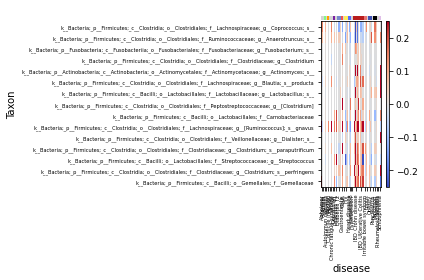

In [72]:
f=specific_no_biop.plot(sample_field='disease',norm=None,cmap=ncm,clim=[-0.25,0.25],
         xticks_max=None,xticklabel_len=None, xticklabel_kwargs={'size':5, 'rotation':90},
         feature_field='Taxon', yticklabel_len=None, yticklabel_kwargs={'size':5}, barx_fields=['disease'],barx_label=False,barx_colors=disease_colors)

In [141]:
f.figure.savefig('../figures/fig4/heatmap-specific.pdf')

### draw the wordcloud for the CD/UC specific bacteria

2021-07-23 19:51:53 INFO Getting dbBact annotations for 15 sequences, please wait...
2021-07-23 19:51:57 INFO got 1377 annotations
2021-07-23 19:51:57 INFO Got 2681 annotation-sequence pairs
2021-07-23 19:51:57 INFO Added annotation data to experiment. Total 1377 annotations, 15 ASVs


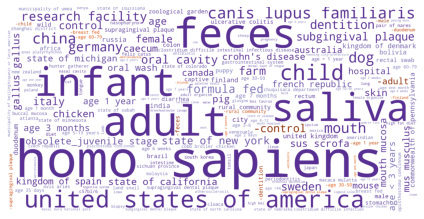

In [73]:
f=dbbact.draw_wordcloud(specific_no_biop)

In [74]:
f.savefig('../figures/fig4/wordcloud-specific.pdf')

### and the specific up dbBact terms

In [81]:
specific_no_biop_up = specific_no_biop.filter_by_metadata('_calour_direction',['IBD_Crohn disease,IBD_Ulcerative Colitis'],axis='f')
specific_no_biop_up

AmpliconExperiment with 55 samples, 13 features

In [82]:
fscores_s, recall_s, precision_s, term_count_s, reduced_f_s = db.get_wordcloud_stats(exp=specific_no_biop_up)

In [84]:
supf = sorted(fscores_s.items(), key=lambda item: item[1],reverse=True)[:10]

In [85]:
supf

[('homo sapiens', 0.3242080533401281),
 ('adult', 0.20150280526596984),
 ('feces', 0.19717766215455504),
 ('infant', 0.18083987888427958),
 ('saliva', 0.17300201657114941),
 ('united states of america', 0.1605285727635876),
 ('child', 0.12875441629164655),
 ('canis lupus familiaris', 0.10420208494944586),
 ('china', 0.09156064679016854),
 ('dog', 0.08947671697036194)]

In [86]:
nsupf

[('feces', 0.3022728051046044),
 ('homo sapiens', 0.29080932586560926),
 ('adult', 0.20146121224737193),
 ('infant', 0.16783988437524214),
 ('united states of america', 0.15644988816013689),
 ('research facility', 0.10909793911647644),
 ('child', 0.10648515855567228),
 ('china', 0.10597010472596594),
 ('gallus gallus', 0.10345584320617486),
 ('chicken', 0.10345584320617486)]

### Now plot a bar plot with all terms in either of the top 5 terms

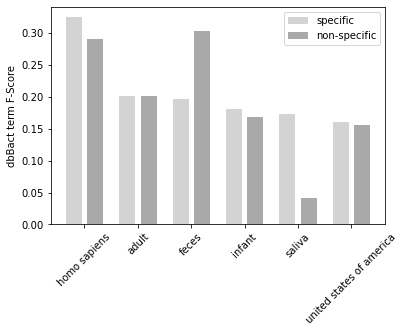

In [169]:
all_terms = [x[0] for x in supf[:5]]
all_terms.extend([x[0] for x in nsupf[:5]])
all_terms=list(set(all_terms))
f=plt.figure()
sv=[]
nsv=[]
for cterm in all_terms:
    sv.append(fscores_s[cterm])
    nsv.append(fscores[cterm])
si=np.argsort(sv)[::-1]
sv=np.array(sv)[si]
nsv=np.array(nsv)[si]
all_terms=np.array(all_terms)[si]
plt.bar(np.arange(len(all_terms))-0.2, sv, width=0.3, color='lightgray')
plt.bar(np.arange(len(all_terms))+0.2, nsv, width=0.3, color='darkgray')
plt.xticks(np.arange(len(all_terms)), all_terms, rotation=45)
plt.legend(['specific', 'non-specific'])
plt.ylabel('dbBact term F-Score')
f.savefig('../figures/dbbact-specific-nonspecific-up-barplot.pdf')

## Also create term enrichment for specific up vs. non-specific up

In [134]:
texp=ratios.copy()
texp.feature_metadata['dir']='na'
for cseq in texp.feature_metadata._feature_id.values:
    if cseq in specific_no_biop_up.feature_metadata._feature_id:
        texp.feature_metadata.loc[texp.feature_metadata._feature_id==cseq, 'dir']='specific'
for cseq in texp.feature_metadata._feature_id.values:
    if cseq in nsup.feature_metadata._feature_id:
        if texp.feature_metadata['dir'][cseq] == 'specific':
            texp.feature_metadata.loc[texp.feature_metadata._feature_id==cseq, 'dir']='na'
            print(cseq)
        else:
            texp.feature_metadata.loc[texp.feature_metadata._feature_id==cseq, 'dir']='nonspecific'

TACGTAGGTGGCGAGCGTTATCCGGATTTACTGGGCGTAAAGGGAGCGTAGGCGGATGATTAAGTGGGATGTGAAATACCCGGGCTCAACTTGGGTGCTGCATTCCAAACTGGTTATCTAGAGTGCAGGAGAGGAGAGTGGAATTCCTAG
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCATGGCAAGCCAGATGTGAAAGCCCGGGGCTCAACCCCGGGACTGCATTTGGAACTGTCAGGCTAGAGTGTCGGAGAGGAAAGCGGAATTCCTAG


In [141]:
texp = texp.filter_by_metadata('dir',['specific','nonspecific'],axis='f')
texp.feature_metadata.dir.value_counts()

nonspecific    29
specific       11
Name: dir, dtype: int64

In [142]:
texp.feature_metadata['_calour_direction']=texp.feature_metadata.dir
texp.feature_metadata['_calour_stat'] = 0
texp.feature_metadata.loc[texp.feature_metadata['dir']=='specific', '_calour_stat'] = 1
texp.feature_metadata.loc[texp.feature_metadata['dir']=='nonspecific', '_calour_stat'] = -1

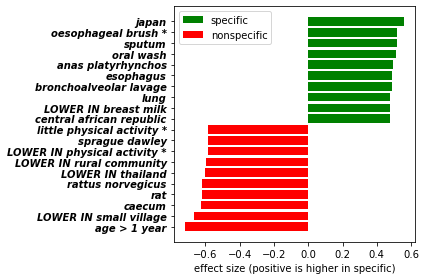

In [162]:
f,res=texp.plot_diff_abundance_enrichment(alpha=0.5)

In [166]:
for cterm in all_terms:
    if cterm in res.feature_metadata.index:
        print(res.feature_metadata.loc[cterm])
    else:
        print('term %s not significant' % cterm)

term homo sapiens not significant
term adult not significant
term                    feces
odif                -0.517241
pvals                0.017982
num_enriched_exps        -1.0
num_total_exps           -1.0
Name: feces, dtype: object
term infant not significant
term                   saliva
odif                 0.407524
pvals                0.037962
num_enriched_exps        -1.0
num_total_exps           -1.0
Name: saliva, dtype: object
term united states of america not significant


# uc-specific-no-biopsies

Filtering CD and IBD

In [ ]:
ratios_no_biop_no_cd_ibd=ratios_no_biop.filter_samples('disease',['IBD_Crohn disease','IBD_Inflammtory bowel disease'], negate=True)
ratios_no_biop_no_cd_ibd

In [ ]:
np.random.seed(2020)
ratios_no_biop_no_cd_ibd=ratio_enrichment(ratios_no_biop_no_cd_ibd, 'disease',['IBD_Ulcerative Colitis'],
                                          alpha=0.1, min_prev=3,random_seed=2020, transform='rankdata')

In [ ]:
ratios_no_biop_no_cd_ibd.save('../ratios/ibd_specific/uc-specific-no-biop')
ratios_no_biop_no_cd_ibd.save_fasta('../ratios/ibd_specific/uc-specific-no-biop.fa')

In [ ]:
ratios_no_biop_no_cd_ibd = ratios_no_biop_no_cd_ibd.sort_samples('disease')

In [ ]:
ratios_no_biop_no_cd_ibd = ratios_no_biop_no_cd_ibd.sort_samples('disease')
f=ratios_no_biop_no_cd_ibd.plot(sample_field='disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None,
                           xticklabel_len=None, xticklabel_kwargs={'size':8, 'rotation':90},
                          feature_field='Taxon', yticklabel_len=None, yticklabel_kwargs={'size':7})

In [ ]:
f.figure.savefig('../figures/fig4/heatmap-uc-specific-no-biop.pdf')

# cd-specific-no-biopsies

Filtering UC and IBD

In [ ]:
ratios_no_biop_uc_ibd=ratios_no_biop.filter_samples('disease',['IBD_Ulcerative Colitis','IBD_Inflammtory bowel disease'], negate=True)


In [ ]:
np.random.seed(2020)
ratios_no_biop_uc_ibd=ratio_enrichment(ratios_no_biop_uc_ibd, 'disease',['IBD_Crohn disease'],alpha=0.1, min_prev=3,random_seed=2020, transform='rankdata')

In [ ]:
ratios_no_biop_uc_ibd.save('../ratios/ibd_specific/cd-specific-no-biop')
ratios_no_biop_uc_ibd.save_fasta('../ratios/ibd_specific/cd-specific-no-biop.fa')

In [ ]:
ratios_no_biop_uc_ibd = ratios_no_biop_uc_ibd.sort_samples('disease')
f=ratios_no_biop_uc_ibd.plot(sample_field='disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None,
                           xticklabel_len=None, xticklabel_kwargs={'size':8, 'rotation':90},
                          feature_field='Taxon', yticklabel_len=None, yticklabel_kwargs={'size':7})

In [ ]:
f.figure.savefig('../figures/fig4/heatmap-cd-specific-no-biop.pdf')